In [24]:
from datasets import load_dataset, Dataset, DatasetDict
from huggingface_hub import login
import os 
import matplotlib.pyplot as plt
from items import Item
from dotenv import load_dotenv

In [25]:
%matplotlib inline

In [26]:
openai_api_key = os.getenv('OPENAI_API_KEY')
hf_token = os.getenv('HF_TOKEN')

In [27]:
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [28]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Appliances", split= "full", trust_remote_code=True)

In [29]:
print(f"Number of Appliances: {len(dataset):,}")

Number of Appliances: 94,327


In [30]:
datapoint = dataset[2]
datapoint

{'main_category': 'Tools & Home Improvement',
 'title': 'Clothes Dryer Drum Slide, General Electric, Hotpoint, WE1M333, WE1M504',
 'average_rating': 3.5,
 'rating_number': 18,
 'features': [],
 'description': ['Brand new dryer drum slide, replaces General Electric, Hotpoint, RCA, WE1M333, WE1M504.'],
 'price': 'None',
 'images': {'hi_res': ['https://m.media-amazon.com/images/I/51TIpnkrEpL._AC_SL1500_.jpg'],
  'large': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_.jpg'],
  'thumb': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_US75_.jpg'],
  'variant': ['MAIN']},
 'videos': {'title': [], 'url': [], 'user_id': []},
 'store': 'GE',
 'categories': ['Appliances', 'Parts & Accessories'],
 'details': '{"Manufacturer": "RPI", "Part Number": "WE1M333,", "Item Weight": "0.352 ounces", "Package Dimensions": "5.5 x 4.7 x 0.4 inches", "Item model number": "WE1M333,", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Requi

In [31]:
prices = 0
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices += 1
    except ValueError as e:
        pass

print(f"There are {prices:,} with prices which is {prices/len(dataset)*100:.1f}%")

There are 46,726 with prices which is 49.5%


In [32]:
lengths = []
prices = []

for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices.append(price)
            contents = datapoint["title"] + str(datapoint["description"]) + str(datapoint["features"]) + str(datapoint["details"])
            lengths.append(len(contents))
    except ValueError as e:
        pass

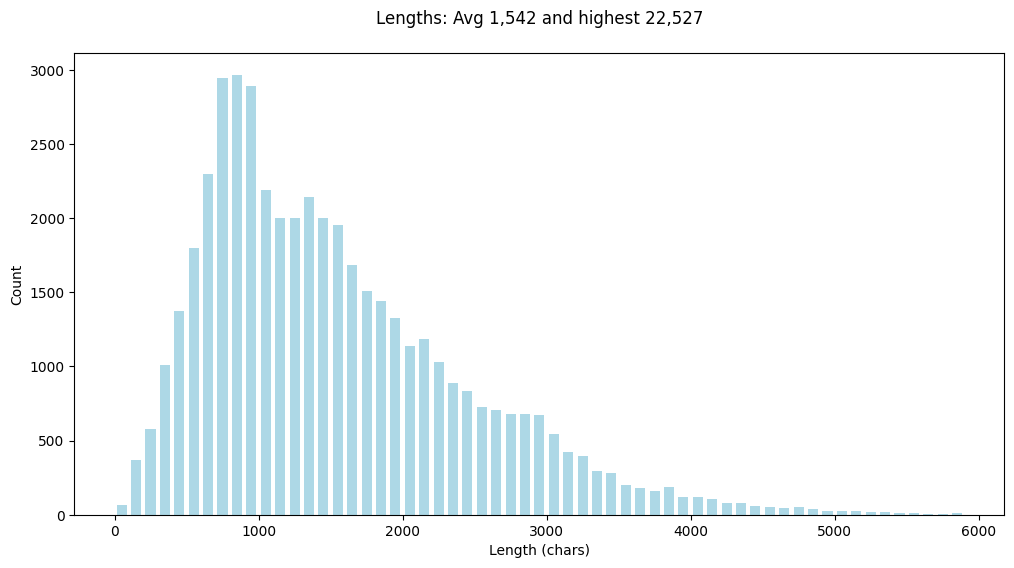

In [33]:
plt.figure(figsize=(12, 6))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()

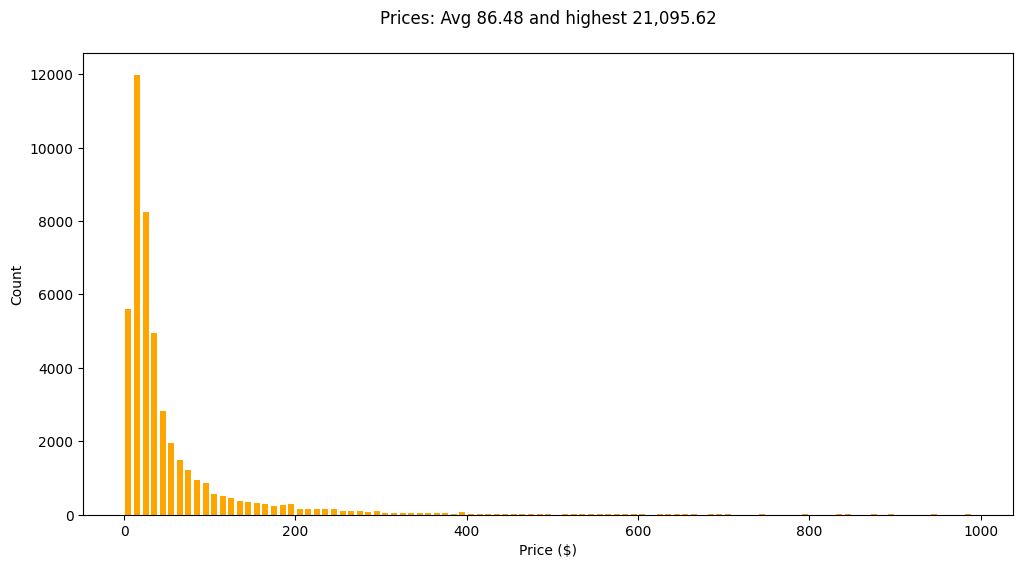

In [35]:
plt.figure(figsize=(12, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()

In [36]:
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 21000:
            print(datapoint['title'])
    except ValueError as e:
        pass

TurboChef BULLET Rapid Cook Electric Microwave Convection Oven
